In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from utils import set_pretty_prints, load_dataset

In [45]:
set_pretty_prints()

In [46]:
df = load_dataset('imobiliare.ro')

In [47]:
df

,Unnamed: 0,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price/Surface,Price,WebPage
0,1,2,56.00,0,1,0,2,1,1,639.29,35800,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAU700006?lista=2349706&listing=1
1,2,2,57.00,0,1,0,2,0,1,628.07,35800,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAG00001O?lista=2349706&listing=1
2,3,2,67.00,0,1,0,2,1,1,591.04,39600,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/rahova/apartament-de-vanzare-2-camere-XAG00001K?lista=2349706&listing=1
3,4,1,48.00,0,1,0,2,1,1,620.83,29800,https://www.imobiliare.ro/vanzare-garsoniere/bucuresti/rahova/garsoniera-de-vanzare-XAG00001J?lista=2349706&listing=1
4,5,3,89.60,0,0,1,3,1,1,1260.04,112900,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/p-ta-presei-libere/apartament-de-vanzare-3-camere-XB0V00003?lista=2349706&listing=1
...,...,...,...,...,...,...,...,...,...,...,...,...
9892,9894,4,90.00,0,0,1,8,0,0,944.44,85000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/crangasi/apartament-de-vanzare-4-camere-X5LL10023?lista=2349706&listing=1
9893,9895,3,85.00,0,0,1,8,1,0,1588.22,134999,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/central/apartament-de-vanzare-3-camere-X9I6100JP?lista=2349706&listing=1
9894,9896,2,48.00,0,0,1,4,0,0,1229.17,59000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/apusului/apartament-de-vanzare-2-camere-XBJG000HP?lista=2349706&listing=1
9895,9897,4,83.81,0,0,1,3,1,1,1312.49,110000,https://www.imobiliare.ro/vanzare-apartamente/bucuresti/theodor-pallady/penthouse-de-vanzare-4-camere-XANO10193?lista=2349706&listing=1


In [48]:
y_sqmp = df["Price/Surface"]
y_price = df['Price']

# TODO: select viable features
START = 1
END = 9
X = df.iloc[:, START:END]


In [49]:
X

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
0,2,56.00,0,1,0,2,1,1
1,2,57.00,0,1,0,2,0,1
2,2,67.00,0,1,0,2,1,1
3,1,48.00,0,1,0,2,1,1
4,3,89.60,0,0,1,3,1,1
...,...,...,...,...,...,...,...,...
9892,4,90.00,0,0,1,8,0,0
9893,3,85.00,0,0,1,8,1,0
9894,2,48.00,0,0,1,4,0,0
9895,4,83.81,0,0,1,3,1,1


In [50]:
y_price

0        35800
1        35800
2        39600
3        29800
4       112900
         ...  
9892     85000
9893    134999
9894     59000
9895    110000
9896     61500
Name: Price, Length: 9897, dtype: int64

## Exploration

Text(0.5, 1.0, 'Distribution of nr of rooms per apartment')

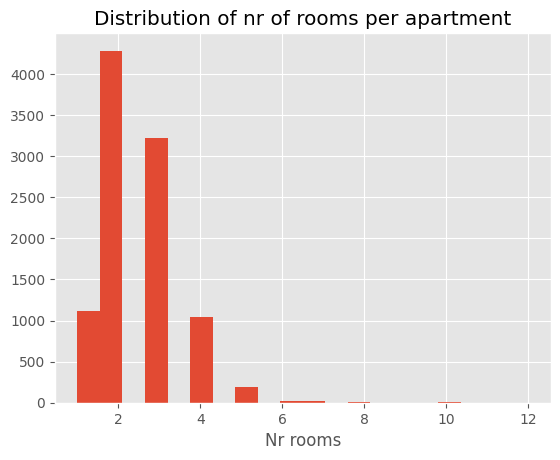

In [51]:
field = 'nr cam'
x_label = 'Nr rooms'
title = 'Distribution of nr of rooms per apartment'
X[field].hist(bins=20)
plt.xlabel(x_label)
plt.title(title)

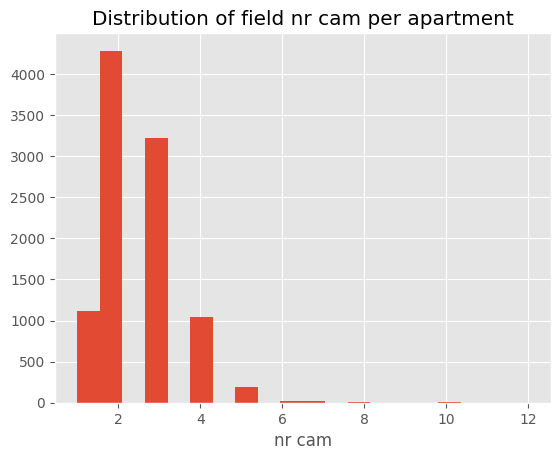

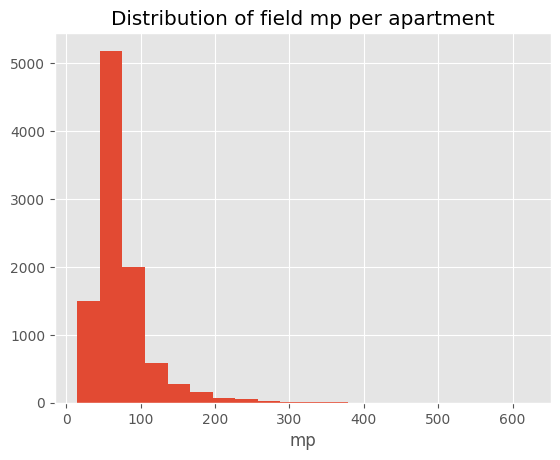

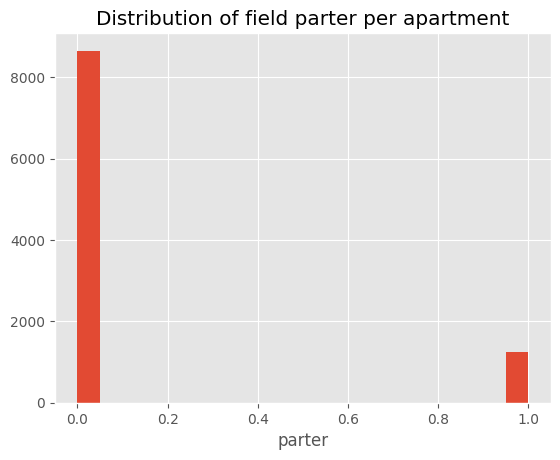

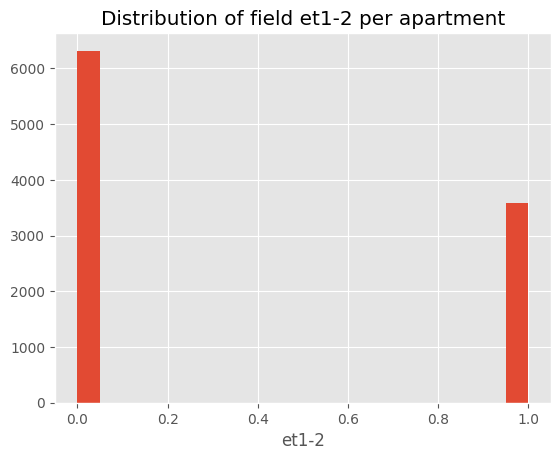

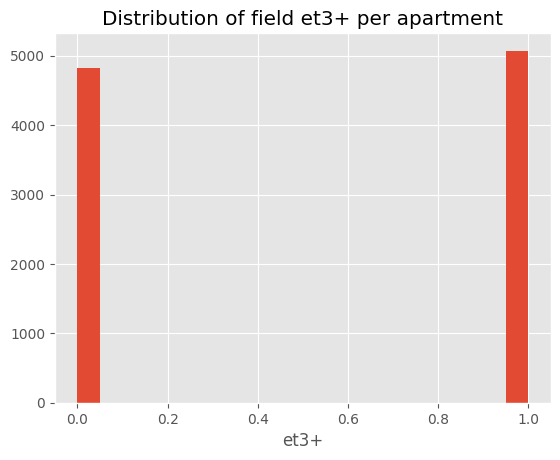

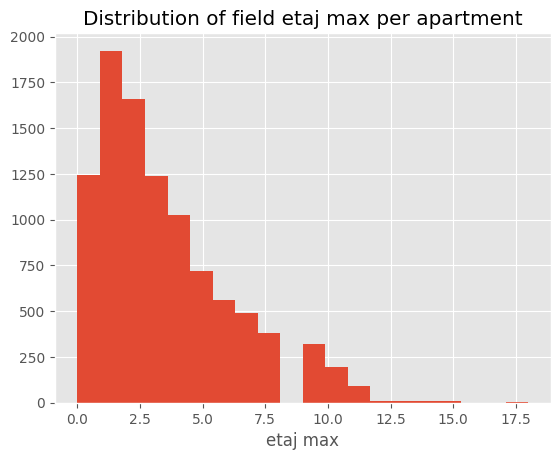

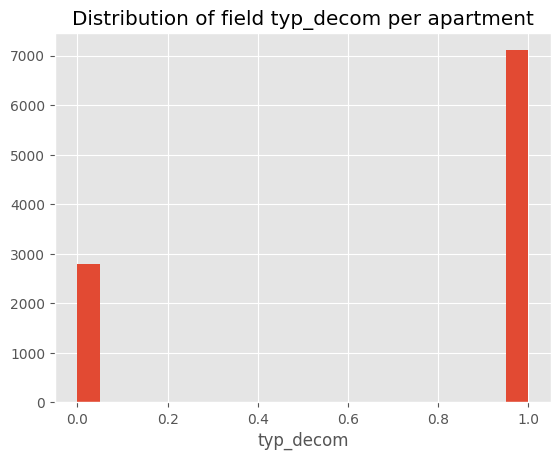

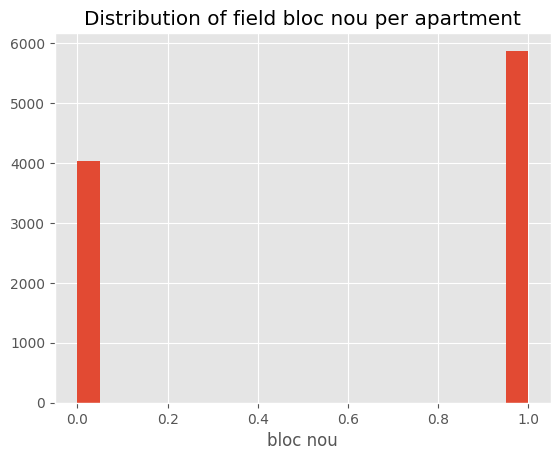

In [52]:
# TODO: Analyse a few more features
for field in X.columns:
    X[field].hist(bins=20)
    plt.xlabel(field)
    plt.title(f'Distribution of field {field} per apartment')
    plt.show()

Text(0.5, 0, 'Price')

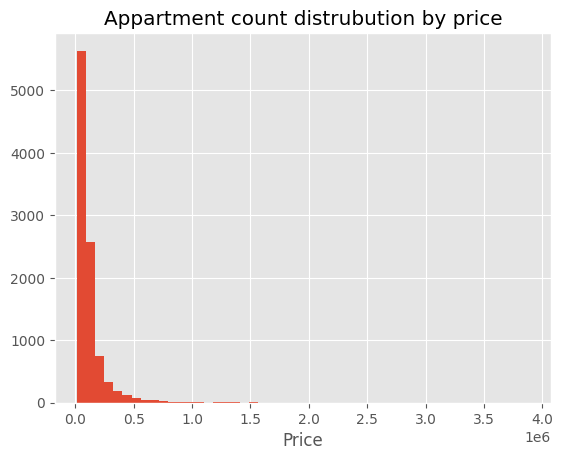

In [53]:
# TODO: Analyse target distribution
target = y_price
title = "Appartment count distrubution by price"
x_label = "Price"
plt.hist(target, bins=50)
plt.title(title)
plt.xlabel(x_label)

Text(0.5, 0, 'Price')

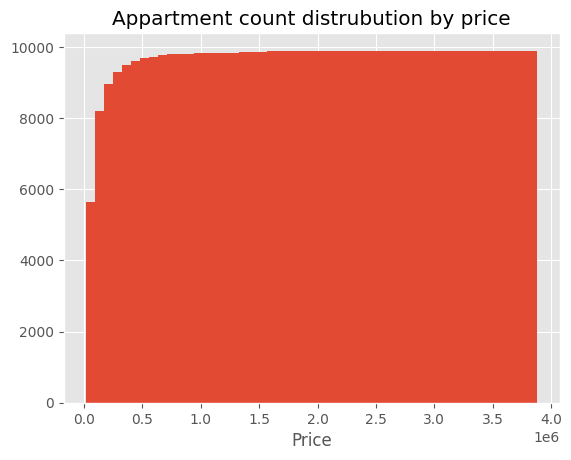

In [54]:
# TODO: Re-display the target distribution
target = y_price
title = "Appartment count distrubution by price"
x_label = "Price"
plot_param = 'cumulative'
plot_param_value = 'True'
kwargs = {plot_param : plot_param_value}
plt.hist(target, bins=50, **kwargs)
plt.title(title)
plt.xlabel(x_label)

In [55]:
X.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000


In [56]:
new_corr_features = ['nr cam', 'mp', 'parter', 'et1-2', 'et3+','etaj max', 'typ_decom', 'bloc nou', 'Price']

In [57]:
df_new = df[new_corr_features]

In [58]:
df_new.corr()

,nr cam,mp,parter,et1-2,et3+,etaj max,typ_decom,bloc nou,Price
nr cam,1.000000,0.777186,0.003816,-0.067465,0.062328,0.073172,-0.000365,-0.139376,0.525333
mp,0.777186,1.000000,0.000869,-0.056167,0.053421,0.065719,0.087754,0.006321,0.770386
parter,0.003816,0.000869,1.000000,-0.285501,-0.388748,-0.448826,0.004277,-0.002453,-0.020806
et1-2,-0.067465,-0.056167,-0.285501,1.000000,-0.772008,-0.500485,0.065535,0.187789,-0.061217
et3+,0.062328,0.053421,-0.388748,-0.772008,1.000000,0.778814,-0.065839,-0.178905,0.072650
etaj max,0.073172,0.065719,-0.448826,-0.500485,0.778814,1.000000,-0.071077,-0.193046,0.091064
typ_decom,-0.000365,0.087754,0.004277,0.065535,-0.065839,-0.071077,1.000000,0.213843,0.034928
bloc nou,-0.139376,0.006321,-0.002453,0.187789,-0.178905,-0.193046,0.213843,1.000000,0.035021
Price,0.525333,0.770386,-0.020806,-0.061217,0.072650,0.091064,0.034928,0.035021,1.000000


## Modelling
- further process X data maybe
- construct normal eq and determine model coefs `(((XtX)^-1)Xt)y (y = x*w => w = y/x)`
- validate results (how, when)

`f(X) = y = X[0]*w[0] + X[1]*w[1] + .... X[N]*w[N] +X[N+1]*w[N+1] | X[N+1] == 1`

In [59]:
X.mean()

nr cam        2.505709
mp           73.704865
parter        0.125695
et1-2         0.361827
et3+          0.512479
etaj max      3.336466
typ_decom     0.717591
bloc nou      0.593210
dtype: float64

In [60]:
X.min()

nr cam        1.0
mp           15.0
parter        0.0
et1-2         0.0
et3+          0.0
etaj max      0.0
typ_decom     0.0
bloc nou      0.0
dtype: float64

In [61]:
X.std()

nr cam        0.950467
mp           40.174869
parter        0.331522
et1-2         0.480553
et3+          0.499870
etaj max      2.818757
typ_decom     0.450194
bloc nou      0.491260
dtype: float64

In [62]:
X.max()

nr cam        12.0
mp           621.0
parter         1.0
et1-2          1.0
et3+           1.0
etaj max      18.0
typ_decom      1.0
bloc nou       1.0
dtype: float64

In [63]:
np_X = X.values

In [64]:
np_X

array([[  2.  ,  56.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  2.  ,  57.  ,   0.  ,   1.  ,   0.  ,   2.  ,   0.  ,   1.  ],
       [  2.  ,  67.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  1.  ,  48.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  3.  ,  89.6 ,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  2.  ,  65.  ,   0.  ,   1.  ,   0.  ,   2.  ,   1.  ,   1.  ],
       [  2.  ,  46.  ,   0.  ,   0.  ,   1.  ,   4.  ,   1.  ,   1.  ],
       [  6.  , 334.  ,   0.  ,   0.  ,   1.  ,  10.  ,   1.  ,   1.  ],
       [  3.  , 104.26,   0.  ,   0.  ,   1.  ,  11.  ,   1.  ,   1.  ],
       [  2.  ,  65.  ,   0.  ,   1.  ,   0.  ,   1.  ,   0.  ,   1.  ],
       [  2.  ,  46.  ,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  1.  ,  43.02,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   1.  ],
       [  3.  ,  80.23,   0.  ,   0.  ,   1.  ,   3.  ,   1.  ,   1.  ],
       [  1.  ,  30.  ,   1.  ,   0.  ,   0.  ,   0

In [65]:
np_X.mean(axis=0)

array([ 2.51, 73.7 ,  0.13,  0.36,  0.51,  3.34,  0.72,  0.59])

In [66]:
np_X_n = (np_X - np_X.mean(0)) / np_X.std(0)

In [67]:
np_X_n

array([[-0.53, -0.44, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-0.53, -0.42, -0.38,  1.33, -1.03, -0.47, -1.59,  0.83],
       [-0.53, -0.17, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-1.58, -0.64, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [ 0.52,  0.4 , -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [-0.53, -0.69, -0.38, -0.75,  0.98,  0.24,  0.63,  0.83],
       [ 3.68,  6.48, -0.38, -0.75,  0.98,  2.36,  0.63,  0.83],
       [ 0.52,  0.76, -0.38, -0.75,  0.98,  2.72,  0.63,  0.83],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.83, -1.59,  0.83],
       [-0.53, -0.69, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-1.58, -0.76,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83],
       [ 0.52,  0.16, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83],
       [-1.58, -1.09,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83],
       [-0.53, -0.19, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83],
       [ 1.57,  0.42, -0.

In [68]:
np_y = y_price.values
np_y_n = (np_y - np_y.min()) / (np_y.max() - np_y.min())
np_y_n

array([0.  , 0.  , 0.01, 0.  , 0.02, 0.01, 0.01, 0.6 , 0.08, 0.01, 0.01, 0.01, 0.02, 0.  , 0.02, 0.03, 0.03, 0.01, 0.01, 0.01, 0.  , 0.02, 0.01, 0.02, 0.01, 0.02, 0.05, 0.05, 0.05, 0.11, 0.01, 0.04, 0.1 , 0.17, 0.11, 0.03, 0.25, 0.11, 0.2 , 0.03, 0.14, 0.  , 0.01, 0.02, 0.01, 0.01, 0.01, 0.02, 0.01, 0.02, 0.14, 0.01, 0.04, 0.03, 0.05, 0.02, 0.02, 0.01, 0.01, 0.1 , 0.07, 0.01, 0.07, 0.03, 0.01, 0.01, 0.01, 0.02, 0.1 , 0.02, 0.05, 0.02, 0.  , 0.02, 0.04, 0.01, 0.01, 0.03, 0.  , 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.03, 0.01, 0.  , 0.04, 0.05, 0.01, 0.01, 0.02, 0.01, 0.01, 0.03, 0.01, 0.03, 0.02, 0.02, 0.02, 0.01, 0.01, 0.04, 0.03, 0.02, 0.01, 0.01, 0.02, 0.01, 0.04, 0.02, 0.12, 0.04, 0.04, 0.02, 0.03, 0.01, 0.02, 0.02, 0.02, 0.  , 0.01, 0.04, 0.04, 0.03, 0.07, 0.06, 0.01, 0.01, 0.05, 0.1 , 0.12, 0.03, 0.03, 0.05, 0.03, 0.02, 0.02, 0.14, 0.04, 0.01, 0.03, 0.02, 0.03, 0.03, 0.02, 0.01, 0.05, 0.03, 0.06, 0.04, 0.02, 0.04, 0.03, 0.03, 0.01, 0.08, 0.01, 0.02, 0.02, 0.01, 0.02, 0.05,
  

In [69]:
np_y.min()


18000

In [70]:
np_y.max()

3880000

In [71]:
y_norm_sub = np_y.min()
y_norm_div = np_y.max() - np_y.min()

In [72]:
# TODO: write normal eq for raw data
np_weights = np.linalg.pinv(np_X.T @ np_X) @ np_X.T @ np_y

# TODO: write normal eq for normalized data
np_weights_n = np.linalg.pinv(np_X_n.T @ np_X_n) @ np_X_n.T @ np_y_n


In [73]:
np_weights

array([-35253.17,   4068.76, -77652.97, -77536.51, -76809.97,   2762.81, -18637.49,   7934.74])

In [74]:
np_weights_n

array([-0.01,  0.04, -0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ])

In [75]:
#TODO: calc predictions for raw data model
np_y_preds = np_X @ np_weights

#TODO: calc predictions for normalized data model
np_y_preds_n = np_X_n @ np_weights_n

In [76]:
np_y_preds

array([  74630.73,   97336.97,  119387.11,   77333.79,  179577.32,  111249.59,   40195.26, 1087562.99,  261327.85,  127124.26,   37432.45,   51429.28,  141453.02,   -1546.01,  116132.1 ,  171701.58,  204724.82,   74630.73,  149873.29,   84551.27,   37952.12,   11713.92,   36277.4 ,  129613.2 ,   40195.26,  102532.64,  100091.39,  170155.47,  142185.39,  163623.82,   72344.98,   85830.98,  492887.12,  807913.7 ,  517665.88,   79176.56,  836395.04,  570559.79,  645163.21,   76965.02,  637025.68,
         17179.8 ,  116624.3 ,  395855.32,   84551.27,   50218.15,   94395.12,  183967.63,  106601.41,   88291.98,  542078.46,   55592.87,  198059.29,   88169.91,  157371.67,   86257.6 ,   94974.54,   36646.17,   90905.78,  493253.31,  271428.34,   78270.98,  195773.55,  111041.96,   59756.74,  199189.04,   36646.17,  102463.61,  440359.4 ,   72474.28,  186639.28,   83059.57,   -2532.72,  125298.64,  151417.53,   88142.97,   56782.36,  155851.83,   19791.7 ,   51686.86,  112555.54,  111041.96,
  

Text(0.5, 1.0, 'Normed data model predictions')

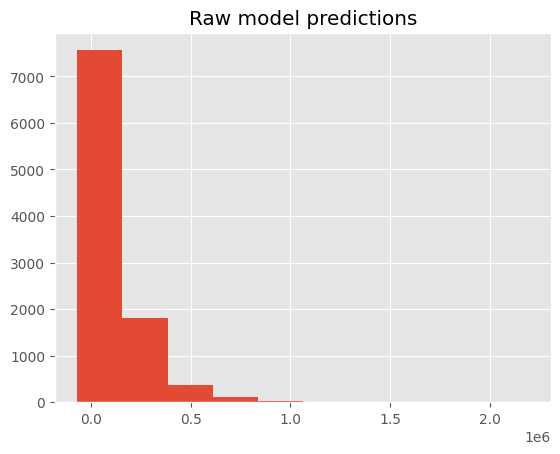

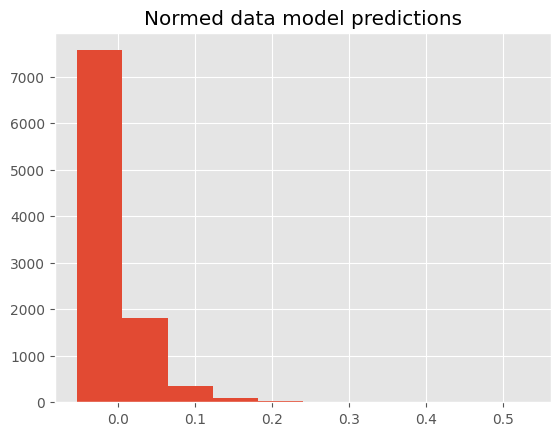

In [77]:
plt.figure()
plt.hist(np_y_preds)
plt.title('Raw model predictions')
plt.figure()
plt.hist(np_y_preds_n)
plt.title('Normed data model predictions')

### One more model before testing results

Lets further improve model by adding bias

In [78]:
ones = np.ones(shape=(np_X_n.shape[0], 1))
ones

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [79]:
np_X_nb = np.concatenate((np_X_n, ones), axis=-1)
np_X_nb

array([[-0.53, -0.44, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83,  1.  ],
       [-0.53, -0.42, -0.38,  1.33, -1.03, -0.47, -1.59,  0.83,  1.  ],
       [-0.53, -0.17, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83,  1.  ],
       [-1.58, -0.64, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83,  1.  ],
       [ 0.52,  0.4 , -0.38, -0.75,  0.98, -0.12,  0.63,  0.83,  1.  ],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.47,  0.63,  0.83,  1.  ],
       [-0.53, -0.69, -0.38, -0.75,  0.98,  0.24,  0.63,  0.83,  1.  ],
       [ 3.68,  6.48, -0.38, -0.75,  0.98,  2.36,  0.63,  0.83,  1.  ],
       [ 0.52,  0.76, -0.38, -0.75,  0.98,  2.72,  0.63,  0.83,  1.  ],
       [-0.53, -0.22, -0.38,  1.33, -1.03, -0.83, -1.59,  0.83,  1.  ],
       [-0.53, -0.69, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83,  1.  ],
       [-1.58, -0.76,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83,  1.  ],
       [ 0.52,  0.16, -0.38, -0.75,  0.98, -0.12,  0.63,  0.83,  1.  ],
       [-1.58, -1.09,  2.64, -0.75, -1.03, -1.18,  0.63,  0.83, 

In [80]:
# TODO: calculate weights
np_weights_nb = np.linalg.pinv(np_X_nb.T @ np_X_nb) @ np_X_nb.T @ np_y_n
np_weights_nb

array([-0.01,  0.04, -0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.03])

In [81]:
# TODO: calculate predictions
np_y_preds_nb = np_X_nb @ np_weights_nb
np_y_preds_nb

array([ 0.01,  0.02,  0.03,  0.02,  0.04,  0.02,  0.01,  0.28,  0.06,  0.03,  0.01,  0.01,  0.03, -0.01,  0.03,  0.04,  0.05,  0.01,  0.03,  0.02,  0.01, -0.  ,  0.  ,  0.03,  0.01,  0.02,  0.02,  0.04,  0.03,  0.04,  0.01,  0.02,  0.12,  0.2 ,  0.13,  0.02,  0.21,  0.14,  0.16,  0.02,  0.16, -0.  ,  0.03,  0.1 ,  0.02,  0.01,  0.02,  0.04,  0.02,  0.02,  0.14,  0.01,  0.05,  0.02,  0.04,  0.02,  0.02,  0.  ,  0.02,  0.12,  0.07,  0.02,  0.05,  0.02,  0.01,  0.05,  0.  ,  0.02,  0.11,  0.01,
        0.04,  0.02, -0.01,  0.03,  0.03,  0.02,  0.01,  0.04,  0.  ,  0.01,  0.02,  0.02,  0.02,  0.01,  0.01,  0.04,  0.02, -0.  ,  0.04,  0.04,  0.02,  0.02,  0.01,  0.  ,  0.02,  0.04,  0.01,  0.01,  0.02,  0.04,  0.02, -0.  ,  0.01,  0.05,  0.03,  0.04,  0.03,  0.01,  0.03,  0.01,  0.04,  0.02,  0.11,  0.06,  0.05,  0.02,  0.03,  0.01,  0.02,  0.02,  0.02, -0.01,  0.  ,  0.07,  0.03,  0.02,  0.12,  0.05,  0.01, -0.  ,  0.03,  0.13,  0.12,  0.04,  0.01,  0.03,  0.03,  0.04,  0.03,  0.16,
      

(array([  21.,  628., 2177., 3021., 1719.,  772.,  433.,  269.,  199.,  143.,  107.,   98.,   78.,   41.,   35.,   30.,   13.,   27.,   15.,   16.,   11.,   13.,    4.,    2.,    2.,    4.,    2.,    2.,    3.,    0.,    1.,    1.,    2.,    0.,    1.,    0.,    0.,    1.,    1.,    2.,    0.,    0.,    0.,    1.,    0.,    0.,    1.,    0.,    0.,    1.]),
 array([-0.02, -0.01,  0.  ,  0.01,  0.02,  0.04,  0.05,  0.06,  0.07,  0.08,  0.09,  0.11,  0.12,  0.13,  0.14,  0.15,  0.17,  0.18,  0.19,  0.2 ,  0.21,  0.22,  0.24,  0.25,  0.26,  0.27,  0.28,  0.29,  0.31,  0.32,  0.33,  0.34,  0.35,  0.36,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.45,  0.46,  0.47,  0.48,  0.49,  0.5 ,  0.52,  0.53,  0.54,  0.55,  0.56]),
 <BarContainer object of 50 artists>)

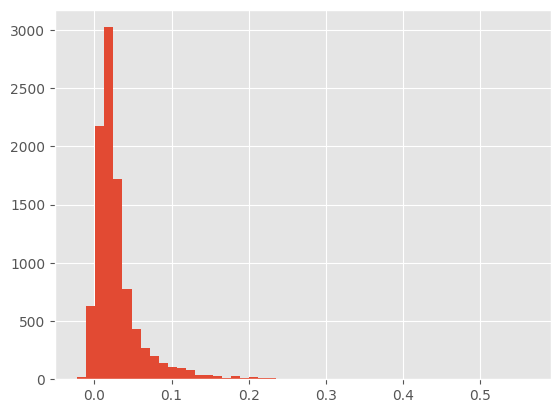

In [82]:
plt.hist(np_y_preds_nb, bins=50)

In [83]:
np_y_pred_price = np_y_preds
np_y_pred_n_price = np_y_preds_n * y_norm_div + y_norm_sub
np_y_pred_nb_price = np_y_preds_nb * y_norm_div + y_norm_sub

### Now lets prepare some friendly calitative analysis outputs

Raw model

In [84]:
df_result_raw = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_price.round(0),
    }
)
df_result_raw.head(10)
df_result_raw.tail(10)

,GOLD,PRED
9887,47000,43077.0
9888,34500,-28459.0
9889,56000,28301.0
9890,101000,139731.0
9891,79524,88871.0
9892,85000,170468.0
9893,134999,166740.0
9894,59000,59036.0
9895,110000,120766.0
9896,61500,30692.0


Normed data model

In [85]:
df_result_n = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_n_price.round(0),
    }
)
df_result_n.head(10)
df_result_n.tail(10)

,GOLD,PRED
9887,47000,-73848.0
9888,34500,-145384.0
9889,56000,-88624.0
9890,101000,22805.0
9891,79524,-28054.0
9892,85000,53543.0
9893,134999,49815.0
9894,59000,-57890.0
9895,110000,3841.0
9896,61500,-86233.0


Normed & bias added

In [86]:

df_result_nb = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_pred_nb_price.round(0),
    }
)
df_result_nb.head(10)
df_result_nb.head(10)

,GOLD,PRED
0,35800,74631.0
1,35800,97337.0
2,39600,119387.0
3,29800,77334.0
4,112900,179577.0
5,37400,111250.0
6,39500,40195.0
7,2350000,1087563.0
8,332000,261328.0
9,39900,127124.0


Now lets see some quantitative analysis of the results

In [87]:
# TODO: complete code below
abs_err = np.abs(y_price - np_y_pred_nb_price)
abs_err

0       38830.726659
1       61536.974840
2       79787.111747
3       47533.793910
4       66677.318352
            ...     
9892    85468.449821
9893    31741.318014
9894       35.526206
9895    10766.019249
9896    30807.961481
Name: Price, Length: 9897, dtype: float64

In [88]:
proc_err = abs_err / y_price
proc_err = proc_err * 100

In [89]:
df_result = pd.DataFrame(
    {
        'GOLD' : y_price,
        'PRED' : np_y_preds_nb.round(0),
        'ERR%' : proc_err.round(2)
    }
)
df_result.head(20)

,GOLD,PRED,ERR%
0,35800,0.0,108.47
1,35800,0.0,171.89
2,39600,0.0,201.48
3,29800,0.0,159.51
4,112900,0.0,59.06
5,37400,0.0,197.46
6,39500,0.0,1.76
7,2350000,0.0,53.72
8,332000,0.0,21.29
9,39900,0.0,218.61


In [90]:
df_result.tail(20)

,GOLD,PRED,ERR%
9877,63000,0.0,5.42
9878,32900,0.0,15.36
9879,53490,0.0,7.56
9880,79000,0.0,17.34
9881,79900,0.0,38.84
9882,149000,0.0,30.66
9883,143000,0.0,8.00
9884,55000,0.0,31.19
9885,62860,0.0,6.89
9886,27500,-0.0,85.11


In [91]:
proc_err.mean()

40.56805033787937

In [92]:
def train_neq(inputs, gold):
    # TODO:
    weights = np.linalg.pinv(inputs.T @ inputs) @ inputs.T @ gold
    return weights

def evaluate(theta, inputs, gold, y_div, y_sub, name=""):
    _y_pred = inputs.dot(theta)
    _y_vals = _y_pred * y_div + y_sub
    
    _y_true = gold * y_div + y_sub
    
    res_err = np.abs(_y_true - _y_vals)
    prc_err = res_err / _y_true
    
    overall = prc_err.mean()
    df_result = pd.DataFrame(
        {
        'GOLD' : _y_true,
        'PRED' : _y_vals.round(0),
        'ERR%' : prc_err.round(2)
        }
    )
    print('Results for', name)
    print(df_result.head(20))
    print(df_result.tail(20))
    print("Overall error: {:.1f}%".format(overall * 100))
    return overall

In [93]:
from sklearn.model_selection import train_test_split
x_trn, x_tst, y_trn, y_tst = train_test_split(np_X_nb, np_y_n, test_size=0.2)

In [94]:
theta = train_neq(
    inputs=x_trn,
    gold=y_trn
)

In [95]:
theta

array([-0.01,  0.04, -0.  , -0.  ,  0.  ,  0.  , -0.  ,  0.  ,  0.03])

In [96]:
evaluate(
    theta=theta,
    inputs=x_trn,
    gold=y_trn,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    name='TRAIN',
)

Results for TRAIN
        GOLD      PRED  ERR%
0    99000.0   27262.0  0.72
1   165999.0  113602.0  0.32
2   255000.0  233908.0  0.08
3    74999.0   68139.0  0.09
4    72300.0  124895.0  0.73
5    59500.0   68141.0  0.15
6   110000.0  122401.0  0.11
7    43500.0   33278.0  0.23
8    51500.0   54228.0  0.05
9   198000.0  171510.0  0.13
10   81081.0  131434.0  0.62
11  139800.0  219941.0  0.57
12  144900.0  130357.0  0.10
13   58400.0   27219.0  0.53
14  101899.0  285033.0  1.80
15  139000.0  101940.0  0.27
16   54000.0   75442.0  0.40
17  125000.0  113526.0  0.09
18   99950.0   68141.0  0.32
19  186000.0  155521.0  0.16
          GOLD      PRED  ERR%
7897  154000.0  134697.0  0.13
7898   88600.0   99488.0  0.12
7899  204325.0  197327.0  0.03
7900   83000.0  174560.0  1.10
7901   45900.0   36730.0  0.20
7902   64000.0   78900.0  0.23
7903   71500.0   62529.0  0.13
7904   46999.0   16945.0  0.64
7905   58500.0   32622.0  0.44
7906  100000.0   92646.0  0.07
7907  139000.0  102768.0  0.26
7

0.4019007608230186

In [97]:
evaluate(
    theta=theta,
    inputs=x_tst,
    gold=y_tst,
    y_div=y_norm_div,
    y_sub=y_norm_sub,
    name='TEST',
)

Results for TEST
        GOLD      PRED  ERR%
0    43000.0   43140.0  0.00
1   235000.0  132517.0  0.44
2    74900.0   93839.0  0.25
3    92000.0   72818.0  0.21
4    53500.0   82992.0  0.55
5    77900.0   65357.0  0.16
6   115000.0  119004.0  0.03
7    93000.0  134879.0  0.45
8   147900.0  122996.0  0.17
9    59000.0   21038.0  0.64
10   79000.0  139136.0  0.76
11   60000.0   87084.0  0.45
12   79500.0  171757.0  1.16
13   95000.0  140869.0  0.48
14   58500.0   41879.0  0.28
15  103000.0  140170.0  0.36
16  185000.0   81660.0  0.56
17   58900.0   67069.0  0.14
18   66000.0   97945.0  0.48
19   63000.0   87256.0  0.39
           GOLD      PRED  ERR%
1960    28500.0   13250.0  0.54
1961    72000.0   39496.0  0.45
1962   210000.0  201129.0  0.04
1963    71500.0   84508.0  0.18
1964   235600.0  210875.0  0.10
1965  1195000.0  810624.0  0.32
1966    97500.0  172774.0  0.77
1967   102900.0  119151.0  0.16
1968    98000.0  156652.0  0.60
1969   110985.0  119127.0  0.07
1970    57900.0   7890

0.40819774914265755